In [29]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
from torch.utils.data import TensorDataset, DataLoader

In [30]:
faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
X = torch.unsqueeze(torch.Tensor(faces['images']),1)

In [31]:
noise = torch.rand_like(X)

In [32]:
ALPHA = 0.3

In [33]:
X_train = TensorDataset(torch.clamp((1-ALPHA)*X+ALPHA*noise, min=0,max=1),X)

(-0.5, 63.5, 63.5, -0.5)

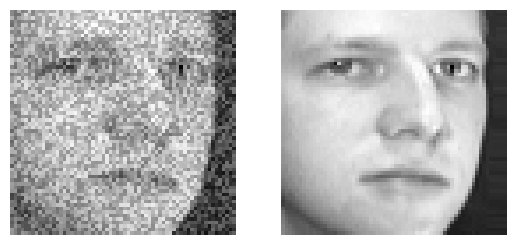

In [34]:
ax = plt.subplot(1,2,1)
ax.imshow(X_train[1][0][0],cmap='gray')
ax.axis('off')
ax = plt.subplot(1,2,2)
ax.imshow(X_train[1][1][0],cmap='gray')
ax.axis('off')

In [35]:
from convautoencoder import DenoisingAutoEncoder

In [36]:
model = DenoisingAutoEncoder()

In [37]:
MULTIPROCESSING_CONTEXT = "fork"

In [38]:
train_loader = DataLoader(X_train, 
                          batch_size=32, 
                          shuffle=True)


In [39]:
trainer = pl.Trainer(max_epochs=50, accelerator="mps")

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [40]:
trainer.fit(model=model,train_dataloaders=train_loader)


  | Name     | Type       | Params
----------------------------------------
0 | _encoder | Sequential | 92.9 K
1 | _decoder | Sequential | 92.8 K
----------------------------------------
185 K     Trainable params
0         Non-trainable params
185 K     Total params
0.743     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 13/13 [00:00<00:00, 24.48it/s, loss=0.00183, v_num=6]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 13/13 [00:00<00:00, 23.90it/s, loss=0.00183, v_num=6]


In [41]:
SIZE=5
indices = torch.randint(0,400,(SIZE,))

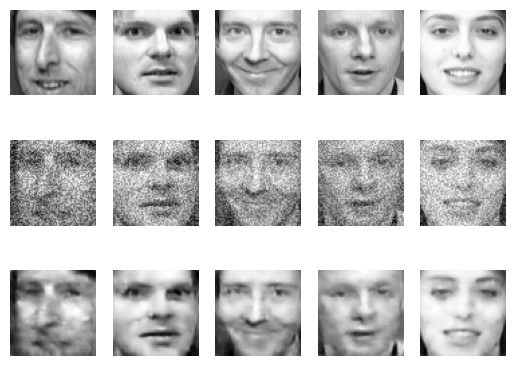

In [42]:
fig, ax = plt.subplots(3,SIZE)
for i in range(SIZE):
    noisy = X_train[indices[i]][0][0,:,:]
    original = X_train[indices[i]][1][0,:,:]
    with torch.no_grad():
        model_img = model(X_train[indices[i]][0])[0,:,:]
    ax[0,i].imshow(original, cmap='gray')
    ax[1,i].imshow(noisy, cmap='gray')
    ax[2,i].imshow(model_img, cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].axis('off')
    ax[2,i].axis('off')